<a href="https://colab.research.google.com/github/othoni-hub/NSI/blob/main/TP_tt_image_sans_np.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Python : TRAITEMENT DE L'IMAGE
*********************
## Olivier THÖNI

### FACULTÉ d'ÉDUCATION UCO
*********************
*document sous licence Creative Commons - CC : By/NC/SA*


NB : La spécification des fonctions (*"DocStrings"*) est en exercices...

## 1. Branchement des bibliothèques, chargement de l'image, affichage et enregistrement

->> bibliothèques

In [1]:
# bibliothèques utilisées

from PIL import Image # PIL est la bibliothèque spécialisée dans le traitement de l'image
import requests # Cette bibliothèque permet de visiter une adresse internet
from io import BytesIO # module pour transformer en bytes

#import numpy as np # Bouh, c'est pas bien !
import matplotlib.pyplot as plt

from math import sqrt, floor

from random import random


->> chargement de l'image depuis le web ou depuis son ordinateur

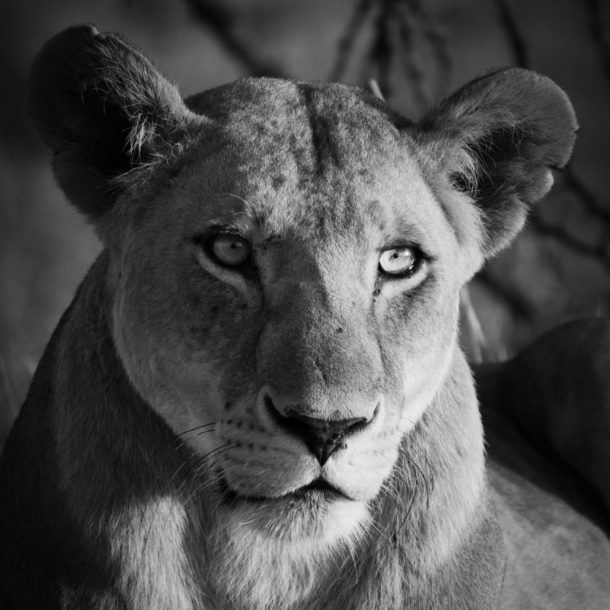

In [8]:
# téléchargement de l'image depuis une adresse internet et création de la variable de tavail img
response = requests.get("https://mk0apprendrelap8cqjv.kinstacdn.com/wp-content/uploads/2018/06/photo-lion_noir-et-blanc_laurent-breillat-610x610.jpg")
#response = requests.get("https://zestedesavoir.com/media/galleries/3620/a72a36e3-9be3-4851-9629-6c3dc6b5b4b4.png")
#response = requests.get("https://cache.marieclaire.fr/data/photo/w700_c17/4i/george-clooney-what-else.jpg")
imgpil = Image.open(BytesIO(response.content))

# L'image peut aussi être ouverte depuis l'ordinateur : 
# imgpil = Image.open("photo-lion_noir-et-blanc_laurent-breillat-610x610.jpg") # donner le chemin complet si pas dans le même répertoire

imgpil


In [9]:
# affichage de la valeur du pixel en haut à gauche, sur 3 couleurs RGB
coin=imgpil.getpixel((0,0))
print("coin haut-gauche, triplet RGB : ", coin)
print(coin[0])

# affichage des dimensions de l'image
largeur, hauteur = imgpil.size
print("largeur : ", largeur)
print("hauteur : ", hauteur)

coin haut-gauche, triplet RGB :  (25, 25, 25)
25
largeur :  610
hauteur :  610




->> **Conversions et affichages**

* **En liste native Python**

In [10]:
def convertfrompil(impil) :
    # fabrique un tableau de type "Portable GrayMap" (pgm), 1 seule ligne
    # et un tableau à la dimension de l'image composé des pixels en niveau de gris
    # à partir de l'image au format PIL

    pgl = [[0]  for i in range(hauteur*largeur)]
    imgrayl = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            pixel = impil.getpixel((j,i))
            imgrayl[i][j] = pixel[0] 
            pgl[i*largeur+j][0] = pixel[0]
    return imgrayl, pgl


In [11]:
#img = np.asarray(imgpil) # transforme l'image PIl en array
#imggrayl, imgpgml = imgpil.convert('L')

# imgpil contient l'image au format PIL : un tableau de triplets donnant les valeurs RVB de chaque pixel
# ...même si l'image est en niveaux de gris, auquel cas les 3 valeurs sont égales

# img contient l'image convertie en array de Numpy


imgl, pgml = convertfrompil(imgpil)

# imggrayl contient l'image en niveau de gris, au format list(hauteur x largeur)
# pgml contient l'image au format pgm, c'est-à-dire un e liste(1, hauteur x largeur)

->> Affichage de l'image

La méthode mathplotlib.pyplot.**imshow** permet d'afficher sous forme d'une image tout tableau, y compris les tableaux natifs Python compatibles avec les formats d'image

In [12]:
# affichage de l'image 
def affichage(im) :
    # affiche côte-à-côte l'image originale et l'image transformée
    plt.subplot(1,2,1)
    plt.imshow(imgl, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(im, cmap='gray') # permet de visualiser l'image en console
    plt.show()



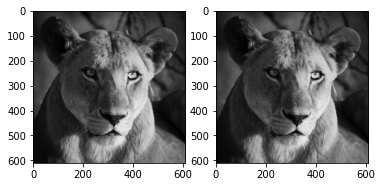

In [13]:
affichage(imgl)

->> Enregistrement de l'image avec PIL ou avec matplotlib

In [14]:
# enregistrement de l'image 

def sauve_image(im) :
                    
    ## enregistrement de l'image depuis matplotlib.image
    import matplotlib.image as mpimg
    mpimg.imsave("resultat.png", im)



In [15]:
sauve_image(imgl)

## 2. Affichage de l'histogramme de l'image


majorité à gauche = image sombre ("bouchée")... majorité à droite = image claire ("brûlée")

In [16]:
def histogramme(im) :
    h = [[0]  for i in range(256)]
    for i in range(hauteur) :
        for j in range(largeur) :
            pixel = int(im[i][j])
            h[pixel][0] = h[pixel][0] + 1
    plt.plot(h)
    

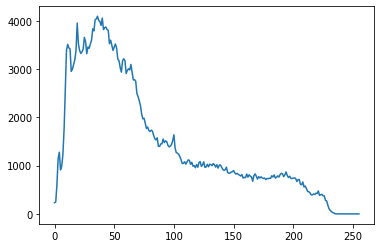

In [18]:
histogramme(imgl)

## 3. Premiers traitements : matriciels

### 3.1. Négatif

Il suffir de remplacer chaque pixel par son complément à 255...

In [19]:
def neg(im) : # version algorithmique
    imn = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            imn[i][j] = 255 - im[i][j]
    return imn

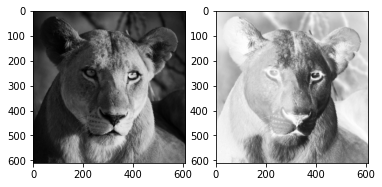

In [20]:
img2 = neg(imgl)
affichage(img2)

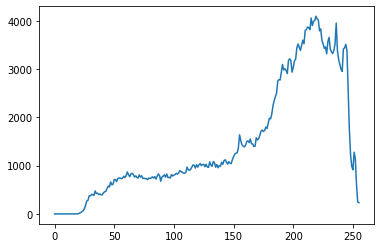

In [21]:
histogramme(img2)

### 3.2. Bordure

Remplacer les pixels périphériques par une bordure blanche et noire.

In [22]:
def bordure(im) :
    imb = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            imb[i][j] = im[i][j] 
            
    for j in range(largeur) :
        imb[0][j] = 0
        imb[hauteur - 1][j] = 0
        imb[1][j] = 255
        imb[hauteur - 2][j] = 255
    for i in range(hauteur) :        
        imb[i][0] = 0
        imb[i][largeur-1] = 0
        imb[i][1] = 255
        imb[i][largeur - 2] = 255
        
    return imb

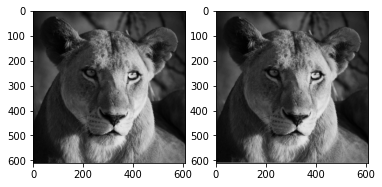

In [23]:
img3 = bordure(imgl)
affichage(img3)

In [24]:
#histogramme(img3)

### 3.3 Transformations géométriques simples
#### 3.3.1 Transposition
Transposer une matrice consiste simplement à échanger ses lignes et ses colonnes

In [25]:
def transpose(im) :
    imt = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            imt[i][j] = im[j][i]
    return imt

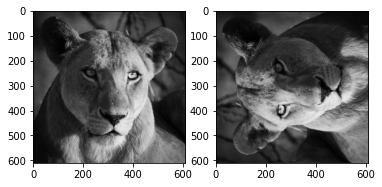

In [26]:
img4 = transpose(imgl)
affichage(img4)

#### 3.3.2. Symétrie Verticale

Effet miroir avec un miroir horizontal

In [28]:
def symV(im) :
    imSV = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            imSV[i][j] = im[hauteur - i - 1][j]
    return imSV

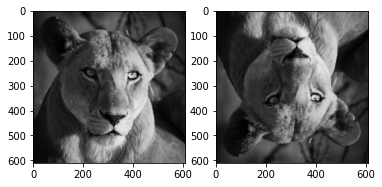

In [29]:
img5 = symV(imgl)
affichage(img5)

#### 3.3.3. Symétrie horizontale

(par rapport à un axe vertical)


In [30]:
def symH(im) :
    imSH = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            imSH[i][j] = im[i] [largeur - j - 1]
    return imSH

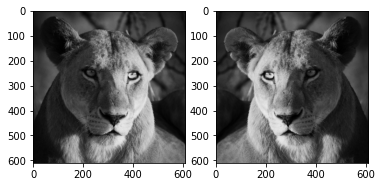

In [31]:
img6 = symH(imgl)
affichage(img6)

#### 3.3.4. Rotation de 90°

In [32]:
def rot(im) :
    imR = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            imR[i][j] = im[largeur - j - 1] [i]
    return imR


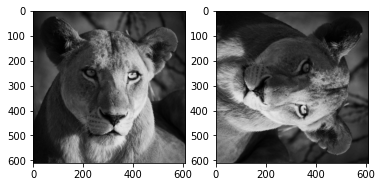

In [33]:
img7 = rot(imgl)
affichage(img7)

#### 3.3.5. Composition des transformations géométriques

Les transformations précédentes peuvent être composées...

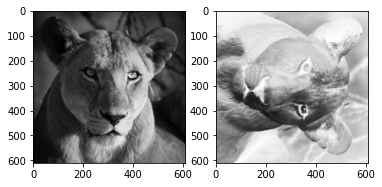

In [34]:
imgcomposee = symH(transpose(neg(imgl)))
affichage(imgcomposee)

## 4. Application d'une fonction numérique pour traiter chaque pixel de la matrice

### 4.1 Image en Noir et Blanc, avec seuil

Tous les pixels plus sombres qu'un niveau de gris donné, appelé seuil, sont changés en pixels noirs, tous les autres en pixels blancs

In [35]:
def seuil(im, s):
    imNB = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            pixel = im[i][j]
            if pixel < s :
                pix = 0
            else :
                pix = 255
            imNB[i][j] = pix
    return imNB


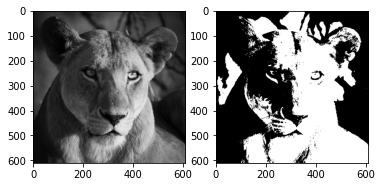

In [36]:
img8 = seuil(imgl, 64)
affichage(img8)

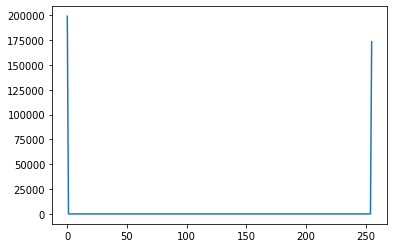

In [37]:
histogramme(img8)

### 4.2. Diminution du nombre de niveaux de gris

In [38]:
def niveau(im,nbniv) :
    amplitude = int(255/nbniv)
    imniv = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) :
            pixel = amplitude * floor(im[i][j] / amplitude)
            imniv[i][j] = pixel
    
    return imniv

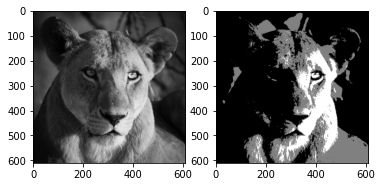

In [39]:
N = 3
img9 = niveau(imgl,N)
affichage(img9)

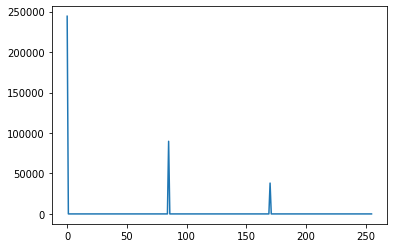

In [40]:
histogramme(img9)

### 4.3. Fonction de contraste / atténuation
#### 4.3.1. Contraste (nécessite Numpy)

In [41]:
import numpy as np # Bouh, c'est pas bien !

# on a besoin de convertir l'image en format numpy.array

def contraste(im, C) :
    # détermination des coefficients de la fonction de contraste en fonction du taux de contraste
    A = np.array([[127**2 , 127 , 1 ],[ 255**2 , 255 , 1], [ 63**2 , 63 , 1]])
    invA = np.linalg.inv(A)
    B = np.array([[1],[1],[1-C]])
    X = np.dot(invA , B)
    a = X[0]
    b = X[1]
    c = X[2]
    
    # définition de la fontion de contraste par une lambda-fonction
    f = (lambda x : floor(a*x**3 + b*x**2 + c*x))
    
    # équivalent avec def :
    # def f(x) :
    #    y = floor(a*x**3 + b*x**2 + c*x)
    #    return y
    
    # tracé de la fonction de constraste
    xx = range(256)
    yy = [f(xx[i]) for i in xx ]
    plt.plot(xx,yy)
    plt.plot(xx,xx)
    plt.show()
    
    cont = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) : 
            cont[i][j] = f(im[i][j])
    
    return cont

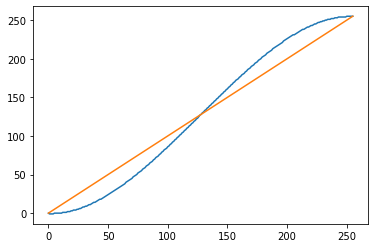

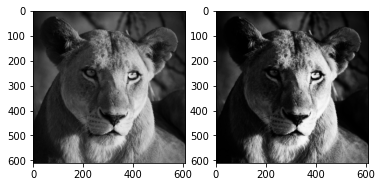

In [42]:
# contraste
img10 = contraste(imgl,(0.4))
affichage(img10)

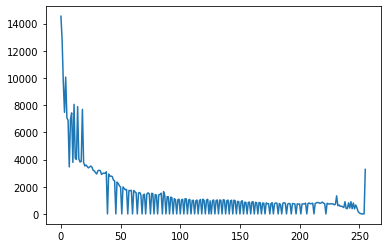

In [43]:
histogramme(img10)

#### 4.3.2. Atténuation

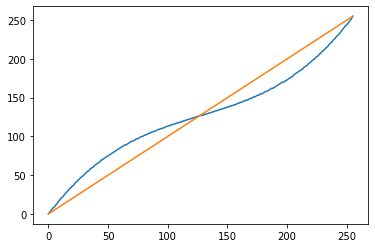

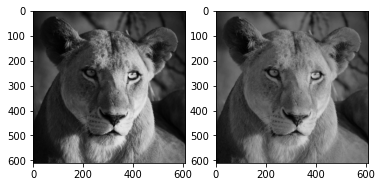

In [44]:
#atténuation : même fonction avec C négatif
img11 = contraste(imgl,(-0.4))
#plt.imshow(imgcont,cmap='gray')
affichage(img11)

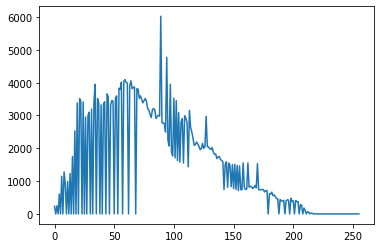

In [45]:
histogramme(img11)

### 4.3. Bruit

Chaque pixel est éclairci de manière aléatoire

In [46]:
def bruit(im, intensite) :
    imB = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) : 
            imB[i][j] = im[i][j] + intensite * 20 * random()
    return imB 

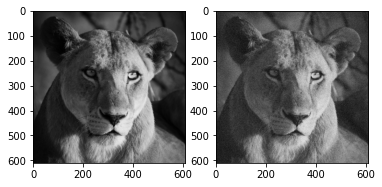

In [47]:
I = 3    # I : intensite du bruit, entre 1 et 4
img12 = bruit(imgl,I)
affichage(img12)


### 4.4. Différence

->> Affiche l'image obtenue par différence de deux images

In [48]:
def difference(im1,im2) :
    imD = [[0] * largeur for i in range(hauteur)]
    for i in range(hauteur) :
        for j in range(largeur) : 
            imD[i][j] = im1[i][j] - im2[i][j]
    
    return imD

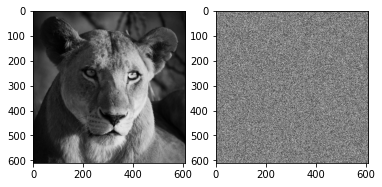

In [49]:
# matrice du bruit
img13 = difference(img12,imgl)
affichage(img13)

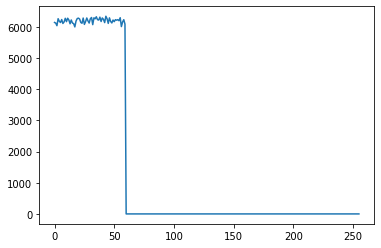

In [50]:
histogramme(img13)

### 4.5. Détection des contours

In [51]:
def contours(im):
    imC = [[0] * largeur for i in range(hauteur)]    
    for i in range(1 , hauteur-1) :
        for j in range(1 , largeur-1) :
            pixelH = im[i-1][j]
            pixelB = im[i+1][j]
            pixelG = im[i][j-1]
            pixelD = im[i][j+1]
            pix = 255 - 200*int(sqrt( (pixelH - pixelB)**2 + (pixelD - pixelG)**2))    
            imC[i][j] = pix
    return imC

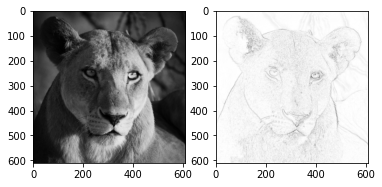

In [52]:
img14 = contours(img11)
affichage(img14)

### 4.6 Flou médian

On remplace dans la matrice, chaque pixel par la médiane des pixels qui l'entourent, sur un "rayon" donné.
On pourra aussi tester le flou "moyen" ("mean") et observer la différence avec le flou médian


In [53]:
def mediane(l) :
    l.sort()
        
    if len(l)%2 == 0 :
        med = floor((l[len(l)/2-1]  + l[len(l)/2])/2)
    else :
        med = floor(l[len(l)//2]) 
        
    return med

def floumedian(im,l):
        
    imFM = [[0] * largeur for i in range(hauteur)]
    
    for i in range(l , hauteur-l) :
        for j in range(l , largeur-l) :
            liste = []
            autour = [[0] * l for i in range(l)] 
            for k in range(l) :
                for m in range(l) :
                    autour[k][m] = im[i - l + k][j - l + m]
                    liste.append(autour[k][m] )
            
            pix = mediane(liste)    
            imFM[i][j] = pix
            
    return imFM

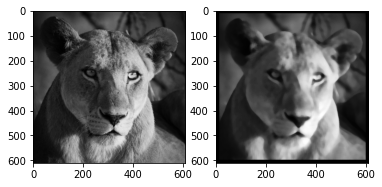

In [54]:
img15 = floumedian(imgl,13)
affichage(img15)

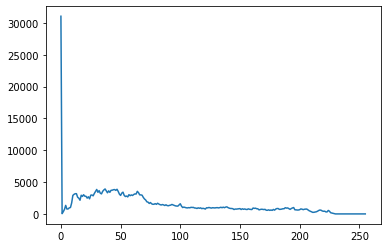

In [55]:
histogramme(img15)

## 5. Opérations matricielles

malheureusement, sans Numpy, ce TP s'arrête ici... la suite en Terminale.
Voir le corrigé de la version"Numpy" de ce TP.